# Assignment 3 - Landon Burleson

## Problem 1 - CNN Architectures

In [25]:
#Adding in the necessary modules needed to complete Assignment 3
import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from tensorflow import keras

In [26]:
#Pulling in the MNIST test data.
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [27]:
#Creating the sequential model for a the number of filters increasing as the layers increase
cnn_model1 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv4"), 
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv5"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool3"),
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])
cnn_model1._name = "cnn_model1"
# cnn_model1.save_weights('cnn_model1')

#Creating the sequential model for a the number of filters decreasing as the layers increase
cnn_model2 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv4"), 
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv5"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool5"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])
cnn_model2._name = "cnn_model2"
# cnn_model2.save_weights('cnn_model2')

#Creating the sequential model for a the number of filters matching an hourglass shape. 
cnn_model3 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv7"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", name="conv8"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool5"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])
cnn_model3._name = "cnn_model3"
# cnn_model3.save_weights('cnn_model3')

c1 = cnn_model1.get_weights()
c2 = cnn_model2.get_weights()
c3 = cnn_model3.get_weights()

cnn_model1.summary()
cnn_model2.summary()
cnn_model3.summary()

Model: "cnn_model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 64)        18496     
                                                                 
 conv3 (Conv2D)              (None, 14, 14, 64)        36928     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 64)          0         
                                                                 
 conv4 (Conv2D)              (None, 7, 7, 128)         73856     
                                                                 
 conv5 (Conv2D)              (None, 7, 7, 128)         1

In [28]:
# Training the architectures defined above. 
e = 10
opt = keras.optimizers.SGD(learning_rate=0.0001)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history1 = cnn_model1.fit(x_train, y_train, epochs=e)
test1 = cnn_model1.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history2 = cnn_model2.fit(x_train, y_train, epochs=e)
test2 = cnn_model2.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
history3 = cnn_model3.fit(x_train, y_train, epochs=e)
test3 = cnn_model3.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4266 - accuracy: 0.8722
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1711 - accuracy: 0.9481
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1318 - accuracy: 0.9594
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1100 - accuracy: 0.9663
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0960 - accuracy: 0.9709
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0858 - accuracy: 0.9735
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0777 - accuracy: 0.9754
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0711 - accuracy: 0.9781
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0653 - accuracy: 0.9800
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0671

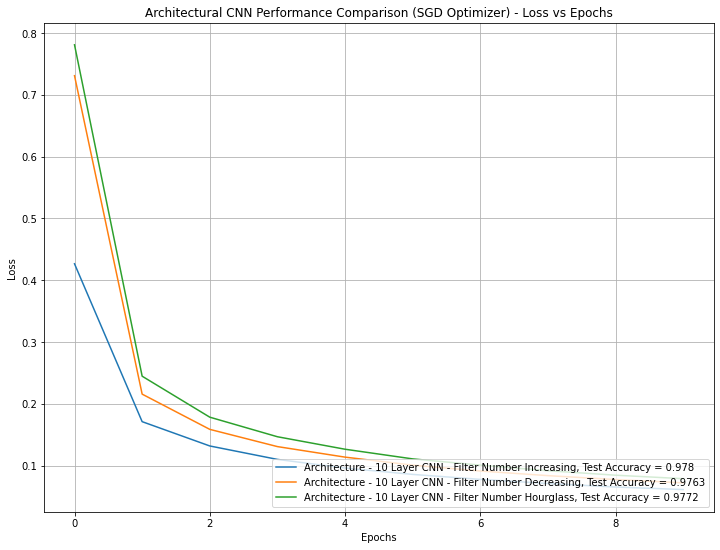

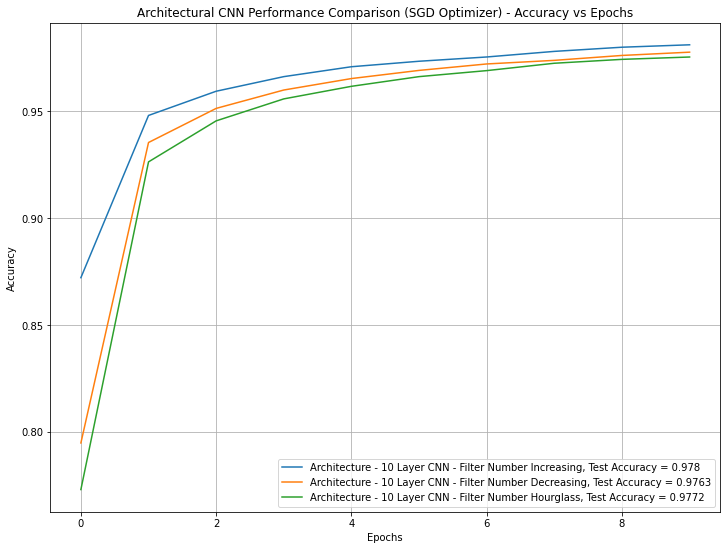

In [29]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (SGD Optimizer) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='lower right')
plt.grid()
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (SGD Optimizer) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='lower right')
plt.grid()
plt.show()

In [30]:
# Training the architectures defined above. 
e = 10
opt = keras.optimizers.Adam(learning_rate=0.0001)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
cnn_model1.set_weights(c1)
history1 = cnn_model1.fit(x_train, y_train, epochs=e)
test1 = cnn_model1.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
cnn_model2.set_weights(c2)
history2 = cnn_model2.fit(x_train, y_train, epochs=e)
test2 = cnn_model2.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
cnn_model3.set_weights(c3)
history3 = cnn_model3.fit(x_train, y_train, epochs=e)
test3 = cnn_model3.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1750 - accuracy: 0.9478
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0559 - accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0370 - accuracy: 0.9886
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0265 - accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0198 - accuracy: 0.9938
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0103 - accuracy: 0.9965
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0093 - accuracy: 0.9968
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.032

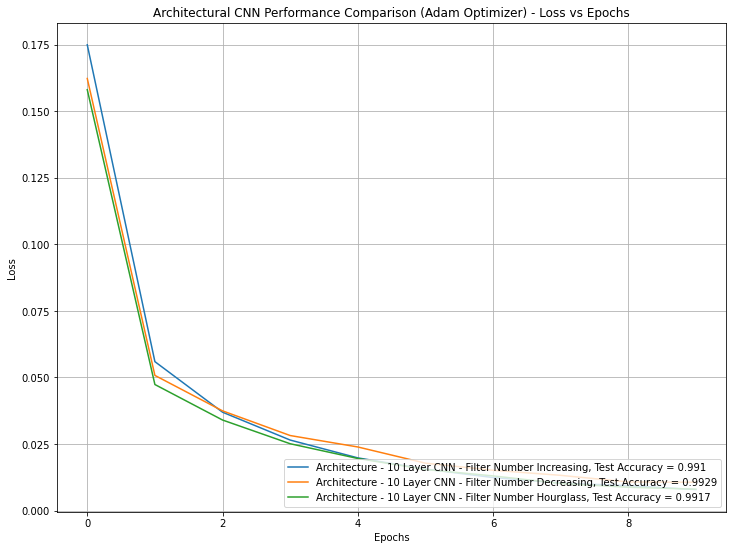

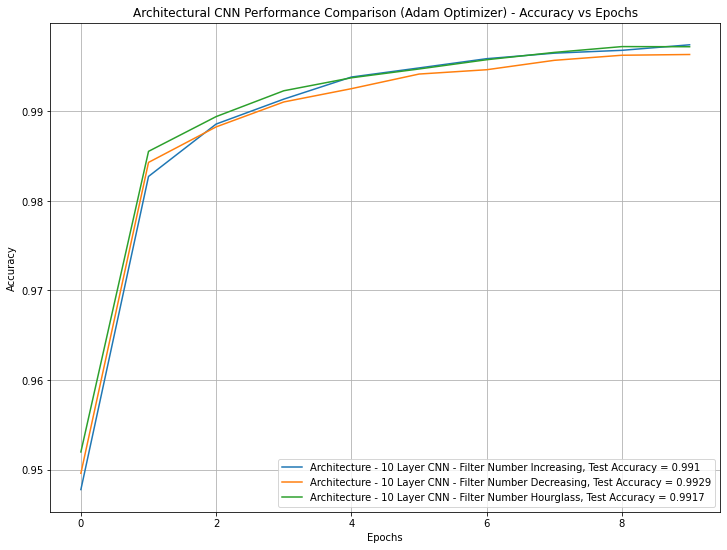

In [31]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (Adam Optimizer) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='lower right')
plt.grid()
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (Adam Optimizer) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='lower right')
plt.grid()
plt.show()

In [32]:
# Training the architectures defined above. 
e = 10
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
cnn_model1.set_weights(c1)
history1 = cnn_model1.fit(x_train, y_train, epochs=e)
test1 = cnn_model1.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
cnn_model2.set_weights(c2)
history2 = cnn_model2.fit(x_train, y_train, epochs=e)
test2 = cnn_model2.evaluate(x_test, y_test)

#Compiling the model with a loss, optimizer, and other metrics
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Training the network.
cnn_model3.set_weights(c3)
history3 = cnn_model3.fit(x_train, y_train, epochs=e)
test3 = cnn_model3.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1970 - accuracy: 0.9410
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0508 - accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0336 - accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0177 - accuracy: 0.9944
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0143 - accuracy: 0.9957
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0099 - accuracy: 0.9973
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0070 - accuracy: 0.9981
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

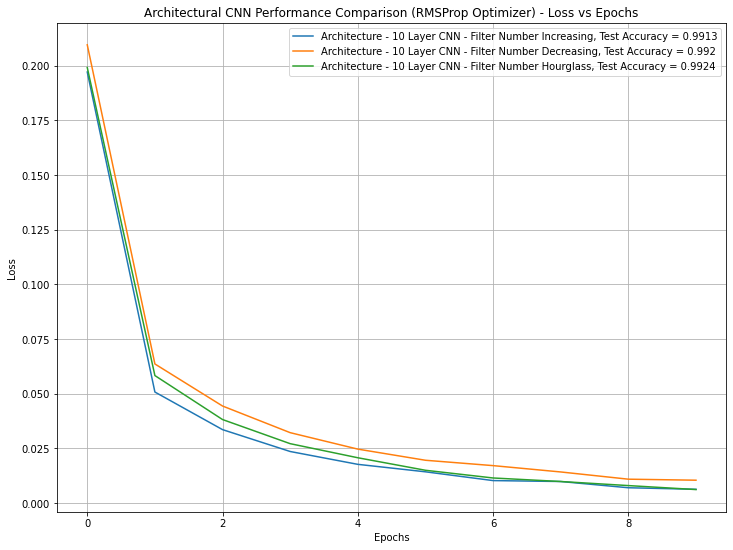

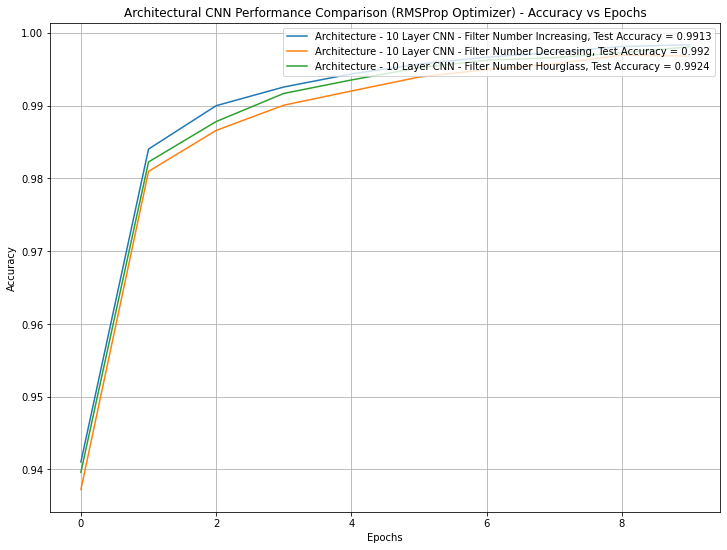

In [33]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (RMSProp Optimizer) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='upper right')
plt.grid()
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison (RMSProp Optimizer) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.legend([f'Architecture - 10 Layer CNN - Filter Number Increasing, Test Accuracy = {test1[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Decreasing, Test Accuracy = {test2[1]:.4}', f'Architecture - 10 Layer CNN - Filter Number Hourglass, Test Accuracy = {test3[1]:.4}'], loc='upper right')
plt.grid()
plt.show()

In [34]:
#Compiling the model with a loss, optimizer, and other metrics
learning = np.linspace(0.0001, 0.005, 4)
history1 = []
test1 = []
history2 = []
test2 = []
history3 = []
test3 = []

cnn_model1.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

cnn_model1.set_weights(c1)
history1.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test1.append(cnn_model1.evaluate(x_test, y_test))

cnn_model2.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

cnn_model2.set_weights(c2)
history2.append(cnn_model2.fit(x_train, y_train, epochs=e, batch_size=32))
test2.append(cnn_model2.evaluate(x_test, y_test))

cnn_model3.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

cnn_model3.set_weights(c3)
history3.append(cnn_model3.fit(x_train, y_train, epochs=e, batch_size=32))
test3.append(cnn_model3.evaluate(x_test, y_test))

for learning_raten in learning:
    cnn_model1.set_weights(c1)
    cnn_model2.set_weights(c2)
    cnn_model3.set_weights(c3)

    opt = keras.optimizers.Adam(learning_rate=learning_raten)
    cnn_model1.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

    cnn_model2.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

    cnn_model3.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

    #Shows the whole network topology for the compiled CNN
    cnn_model1.summary()
    cnn_model2.summary()
    cnn_model3.summary()

    #Training the network.
    history1.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32)) 
    history2.append(cnn_model2.fit(x_train, y_train, epochs=e, batch_size=32)) 
    history3.append(cnn_model3.fit(x_train, y_train, epochs=e, batch_size=32)) 

    test1.append(cnn_model1.evaluate(x_test, y_test))
    test2.append(cnn_model2.evaluate(x_test, y_test))
    test3.append(cnn_model3.evaluate(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1722 - accuracy: 0.9522
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0553 - accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0444 - accuracy: 0.9868
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0393 - accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0352 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0322 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0289 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0292 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0254 - accuracy: 0.9928
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0432 

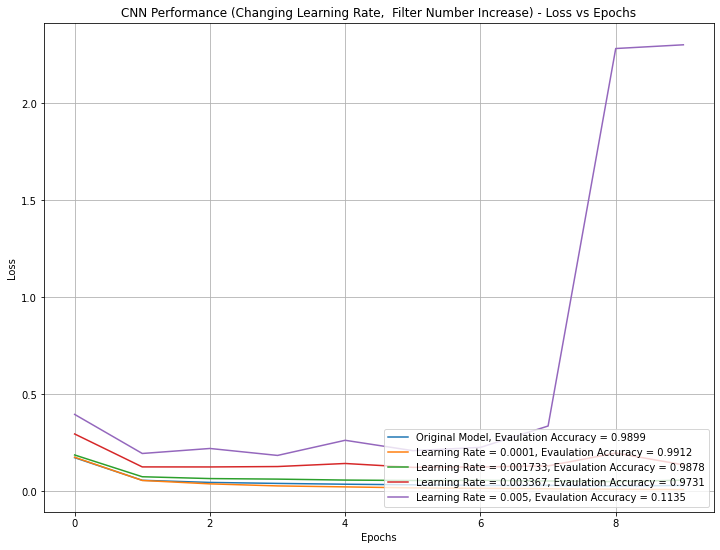

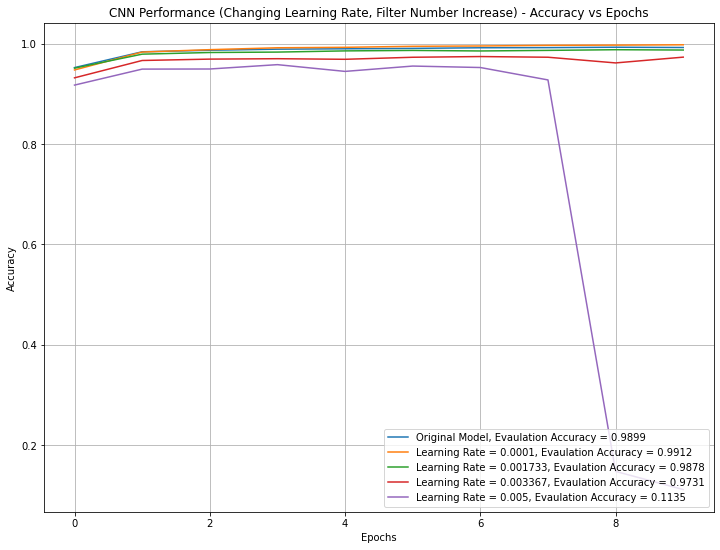

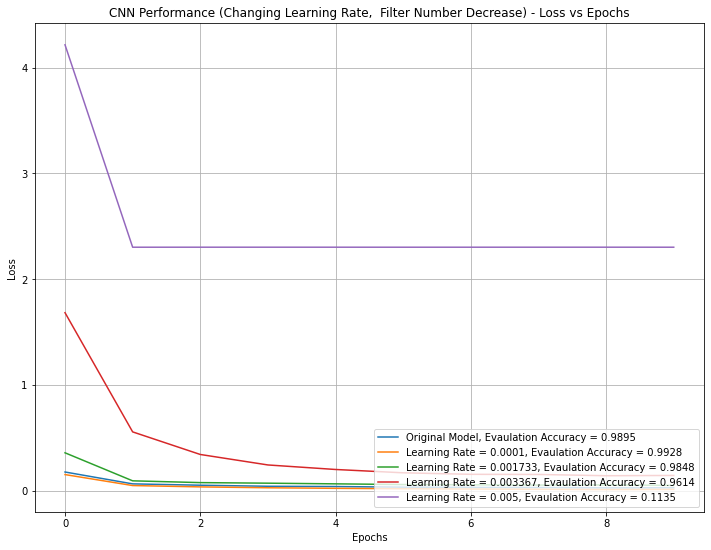

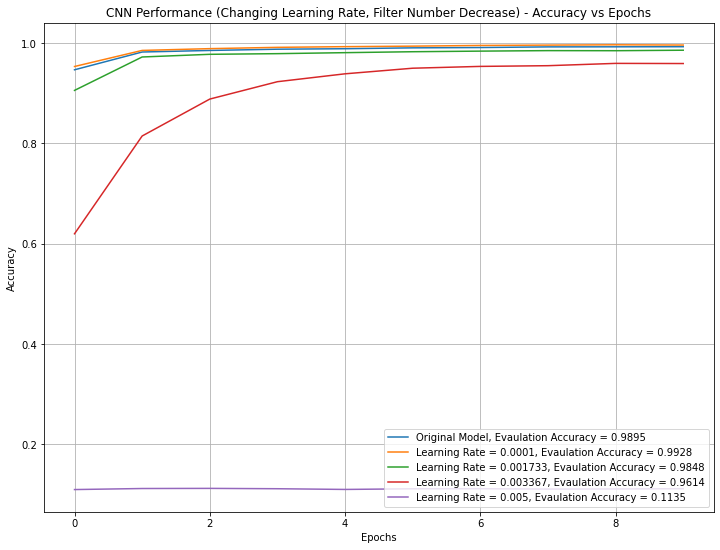

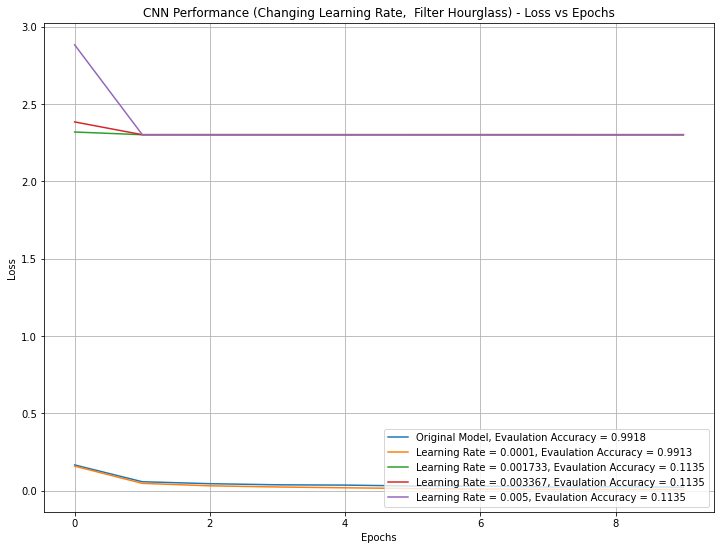

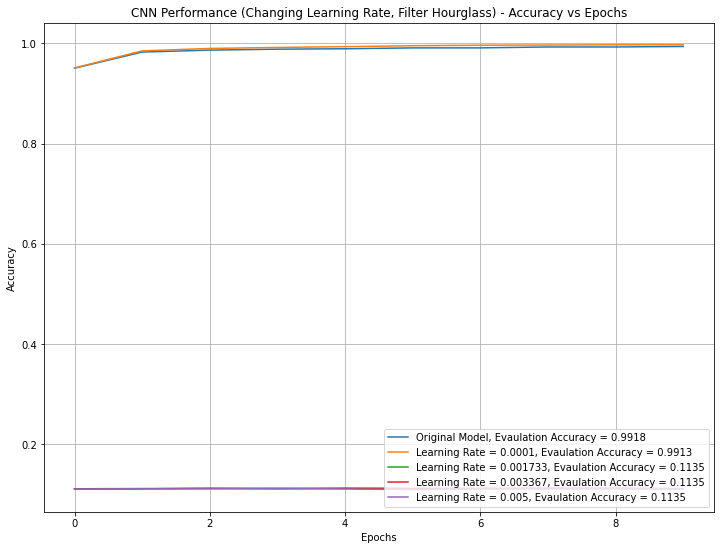

In [35]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate,  Filter Number Increase) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history1):
	if(idx == 0):
		plt.plot(history1[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test1[idx][1]:.4}')
	else:
		plt.plot(history1[idx].history['loss'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test1[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate, Filter Number Increase) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history1[1].history['accuracy']

for idx, i in enumerate(history1):
	if (idx == 0):
		plt.plot(history1[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test1[idx][1]:.4}')
	else:
		plt.plot(history1[idx].history['accuracy'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test1[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()


# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate,  Filter Number Decrease) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history2):
	if(idx == 0):
		plt.plot(history2[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test2[idx][1]:.4}')
	else:
		plt.plot(history2[idx].history['loss'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test2[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate, Filter Number Decrease) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history1[1].history['accuracy']

for idx, i in enumerate(history2):
	if (idx == 0):
		plt.plot(history2[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test2[idx][1]:.4}')
	else:
		plt.plot(history2[idx].history['accuracy'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test2[idx][1]:.4}')
		
plt.grid()
plt.legend(loc="lower right")
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate,  Filter Hourglass) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history3):
	if(idx == 0):
		plt.plot(history3[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test3[idx][1]:.4}')
	else:
		plt.plot(history3[idx].history['loss'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test3[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Learning Rate, Filter Hourglass) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

for idx, i in enumerate(history3):
	if (idx == 0):
		plt.plot(history3[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test3[idx][1]:.4}')
	else:
		plt.plot(history3[idx].history['accuracy'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test3[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()

In [36]:
#Compiling the model with a loss, optimizer, and other metrics
batches = [16, 32, 64]
history1 = []
test1 = []
history2 = []
test2 = []
history3 = []
test3 = []

cnn_model1.set_weights(c1)
cnn_model2.set_weights(c2)
cnn_model3.set_weights(c3)

opt = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model1.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])

history1.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test1.append(cnn_model1.evaluate(x_test, y_test))

cnn_model2.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])

history2.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test2.append(cnn_model1.evaluate(x_test, y_test))

cnn_model3.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])

history3.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=32))
test3.append(cnn_model1.evaluate(x_test, y_test))

for bat in batches:
    cnn_model1.set_weights(c1)
    cnn_model2.set_weights(c2)
    cnn_model3.set_weights(c3)
    cnn_model1.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])
    cnn_model2.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])
    cnn_model3.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])
    #Shows the whole network topology for the compiled CNN
    cnn_model1.summary()
    cnn_model2.summary()
    cnn_model3.summary()

    #Training the network.
    history1.append(cnn_model1.fit(x_train, y_train, epochs=e, batch_size=bat)) 
    history2.append(cnn_model2.fit(x_train, y_train, epochs=e, batch_size=bat)) 
    history3.append(cnn_model3.fit(x_train, y_train, epochs=e, batch_size=bat)) 

    test1.append(cnn_model1.evaluate(x_test, y_test))
    test2.append(cnn_model2.evaluate(x_test, y_test))
    test3.append(cnn_model3.evaluate(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1791 - accuracy: 0.9465
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0549 - accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0371 - accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0277 - accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0212 - accuracy: 0.9931
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0158 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0133 - accuracy: 0.9957
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0089 - accuracy: 0.9971
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0

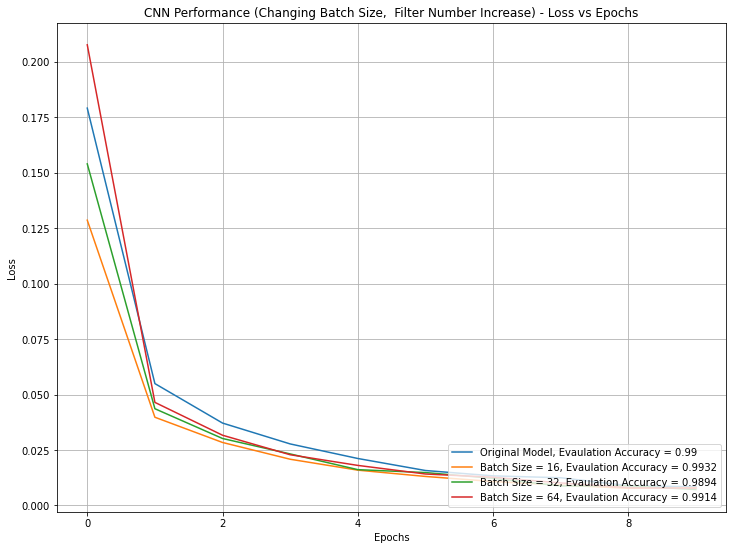

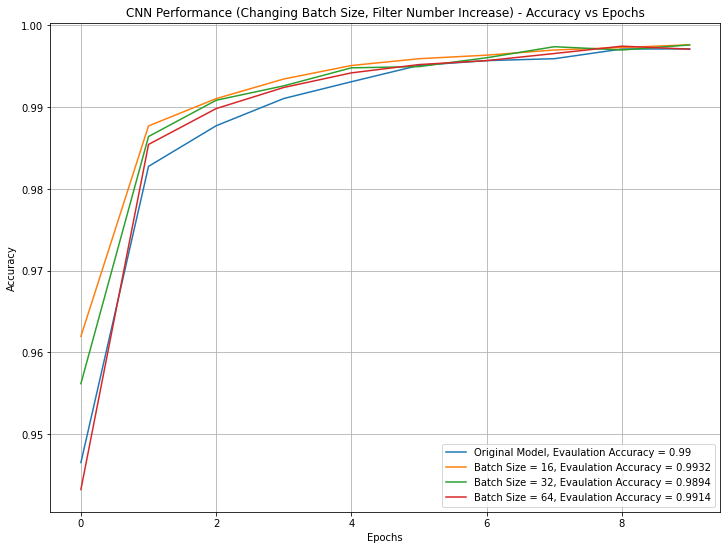

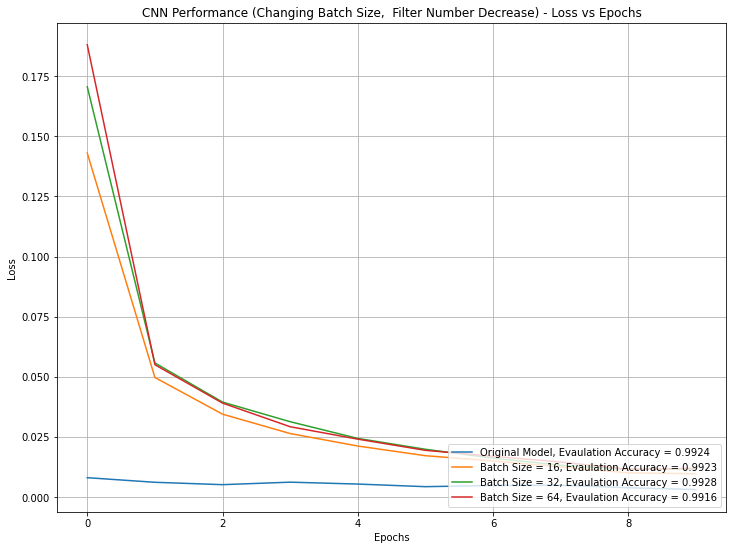

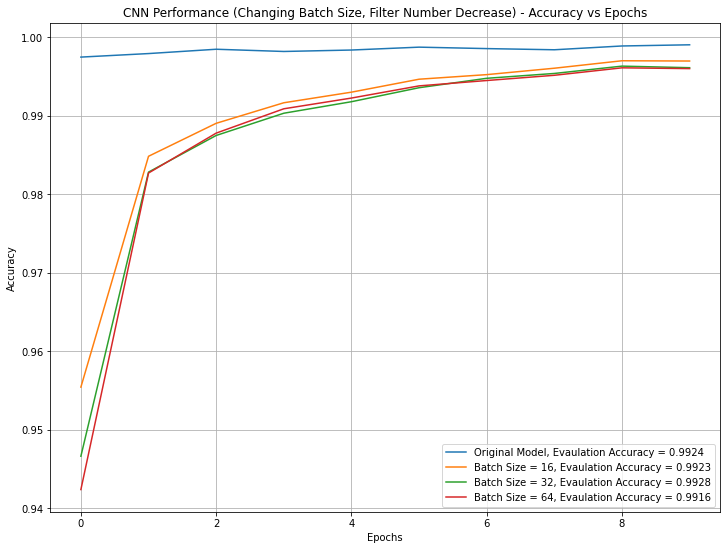

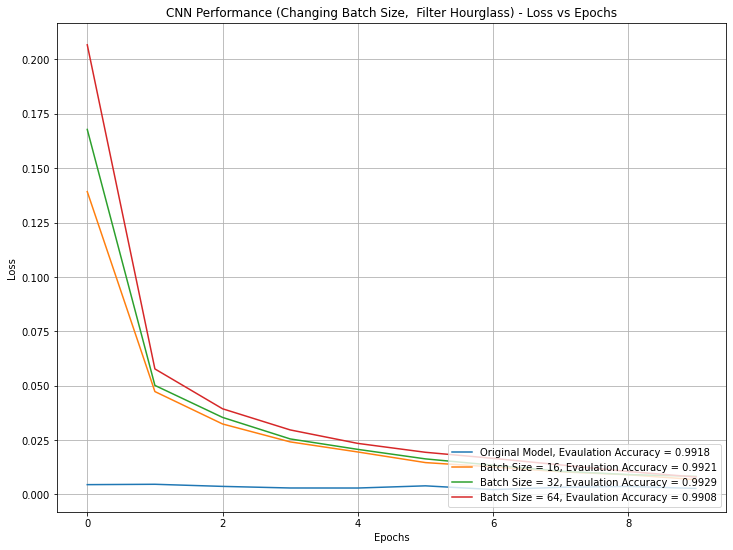

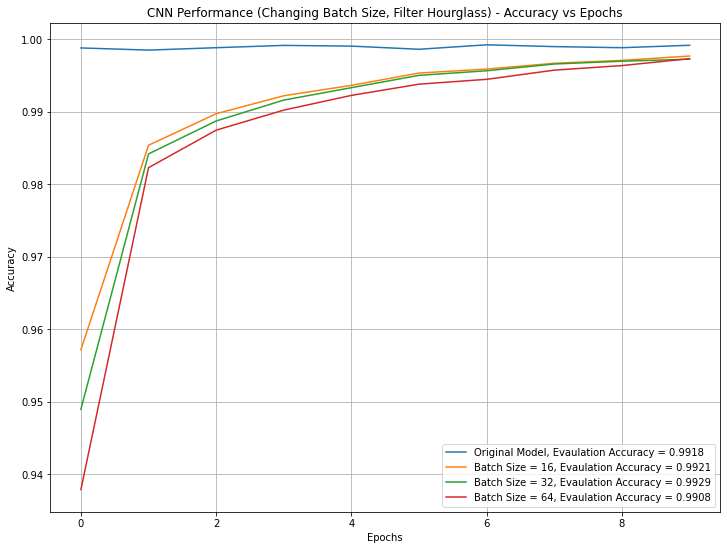

In [38]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size,  Filter Number Increase) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history1):
	if(idx == 0):
		plt.plot(history1[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test1[idx][1]:.4}')
	else:
		plt.plot(history1[idx].history['loss'], label=f'Batch Size = {batches[idx-1]}, Evaulation Accuracy = {test1[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size, Filter Number Increase) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history1[1].history['accuracy']

for idx, i in enumerate(history1):
	if (idx == 0):
		plt.plot(history1[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test1[idx][1]:.4}')
	else:
		plt.plot(history1[idx].history['accuracy'], label=f'Batch Size = {batches[idx-1]}, Evaulation Accuracy = {test1[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()


# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size,  Filter Number Decrease) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history2):
	if(idx == 0):
		plt.plot(history2[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test2[idx][1]:.4}')
	else:
		plt.plot(history2[idx].history['loss'], label=f'Batch Size = {batches[idx-1]}, Evaulation Accuracy = {test2[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size, Filter Number Decrease) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history1[1].history['accuracy']

for idx, i in enumerate(history2):
	if (idx == 0):
		plt.plot(history2[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test2[idx][1]:.4}')
	else:
		plt.plot(history2[idx].history['accuracy'], label=f'Batch Size = {batches[idx-1]}, Evaulation Accuracy = {test2[idx][1]:.4}')
		
plt.grid()
plt.legend(loc="lower right")
plt.show()

# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size,  Filter Hourglass) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history3):
	if(idx == 0):
		plt.plot(history3[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test3[idx][1]:.4}')
	else:
		plt.plot(history3[idx].history['loss'], label=f'Batch Size = {batches[idx-1]}, Evaulation Accuracy = {test3[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("CNN Performance (Changing Batch Size, Filter Hourglass) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

for idx, i in enumerate(history3):
	if (idx == 0):
		plt.plot(history3[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test3[idx][1]:.4}')
	else:
		plt.plot(history3[idx].history['accuracy'], label=f'Batch Size = {batches[idx-1]}, Evaulation Accuracy = {test3[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()

### Problem 1 - Response

In response to __Problem 1's__ questions, the standard RMSProp optimizer seemed to produce excellent
results for the __Increasing__ architecture in both the training and test dataset. The accuracy for
each was recorded as 99.84% and 99.13% respectively. This result utilized a 0.0001 learning rate and
a default batch size of 32. The __Decreasing__ and __Hourglass__ architectures both achieved similar
results with a learning rate set to 0.0001 and batch size of 32. Both of which exceeded 98% accuracy
on both the training and test data sets using these hyperparameters. RMSProp provided the best
accuracy out of the other optimizers used (i.e. SGD and Adam) and also provided the most distinct
performance discrepancies between the three models. The learning rate seemed to produce the most
meaningful impact on the accuracy across all architectures. The batch size also produced various
differences in the three tested architectures but ultimately, these changes in accuracy were
negligible and often required a longer turn around in terms of epoch step time as well to produce
minimal accuracy improvements. The accuracy would increase as the batch number decreased and would
decrease as the batch size increased. The delay in each epoch step would increase as the
batch size decreased. The best performance for each architecture is using a learning rate of 0.0001,
batch size of 32, and RMSProp optimizer in terms of both train and test dataset prediction accuracy. 

Increasing the learning rate with the Adam optimizer produced results of diminishing returns as the accuracy plateaued during the training phase with similar accuracy results for the testing portion. 

Changing the batch size, as mentioned above, improved the step time needed to weave through the architecture. However, the accuracy improvements were negligible during testing and proved to have a much lower impact on the overall accuracy performance compared to the learning rate or optimizer chosen. A batch size of 32 paired with a 0.0001 learning rate proved to have excellent results across the board. 

***

## Problem 2

The following code demonstrates the LaNet7 architecture in tensorflow using the MNIST dataset. 

In [39]:
#Pulling in the cifar10 test data.
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

The following code represents the sequential LeNet model and the code needed to train based upon
changing the learning rate.

In [40]:
# Building the LeNet model in keras
e = 25
lanet = keras.models.Sequential([
    keras.layers.Conv2D(6, (5, 5), strides=(1, 1), padding='same', input_shape = (32, 32, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(16, (5, 5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='same', activation='relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])


#Compiling the model with a loss, optimizer, and other metrics
learning = np.linspace(0.0001, 0.005, 3)
history4 = []
test4 = []

lanet.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

l1 = lanet.get_weights()

history4.append(lanet.fit(x_train, y_train, epochs=e, batch_size=32))
test4.append(lanet.evaluate(x_test, y_test))

for learning_raten in learning:
    lanet.set_weights(l1)
    opt = keras.optimizers.Adam(learning_rate=learning_raten)
    lanet.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

    #Shows the whole network topology for the compiled CNN
    lanet.summary()

    #Training the network.
    history4.append(lanet.fit(x_train, y_train, epochs=e, batch_size=32)) 
    test4.append(lanet.evaluate(x_test, y_test))


Epoch 1/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8572 - accuracy: 0.3822
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3856 - accuracy: 0.5115
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2545 - accuracy: 0.5575
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1508 - accuracy: 0.5979
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0608 - accuracy: 0.6286
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9658 - accuracy: 0.6650
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8834 - accuracy: 0.6903
Epoch 8/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7965 - accuracy: 0.7203
Epoch 9/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7152 - accuracy: 0.7512
Epoch 10/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.655

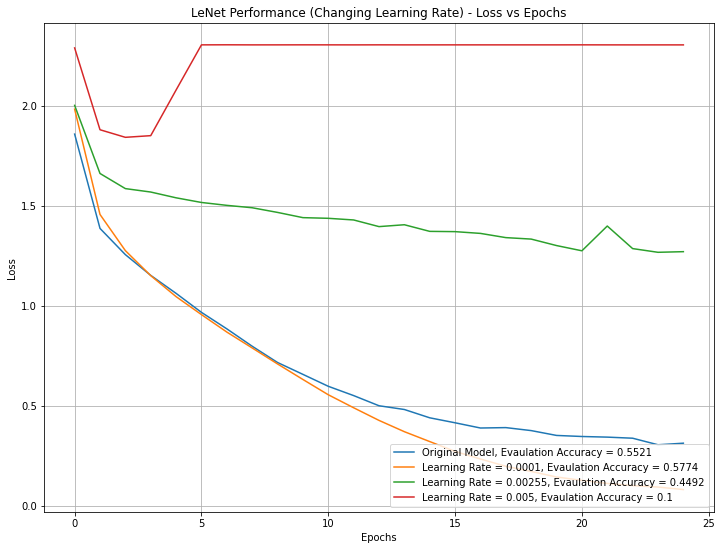

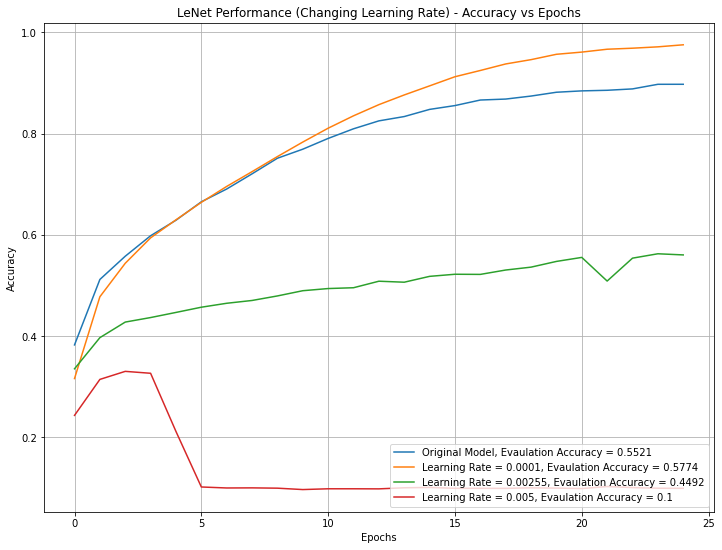

In [41]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Changing Learning Rate) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history4):
	if(idx == 0):
		plt.plot(history4[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test4[idx][1]:.4}')
	else:
		plt.plot(history4[idx].history['loss'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test4[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Changing Learning Rate) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

best = history4[1].history['accuracy']

for idx, i in enumerate(history4):
	if (idx == 0):
		plt.plot(history4[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test4[idx][1]:.4}')
	else:
		plt.plot(history4[idx].history['accuracy'], label=f'Learning Rate = {learning[idx-1]:.4}, Evaulation Accuracy = {test4[idx][1]:.4}')

plt.grid()
plt.legend(loc="lower right")
plt.show()

### Problem 2 - Batch Size
The following code represents the altering of the batch size in relation to the model accuracy. 

In [42]:
#Compiling the model with a loss, optimizer, and other metrics
batches = [16, 32, 64] 
history4 = []
test4 = []

lanet.set_weights(l1) #Reset weights to initial values
opt = keras.optimizers.Adam(learning_rate=0.0001)
lanet.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])

history4.append(lanet.fit(x_train, y_train, epochs=e, batch_size=8))
test4.append(lanet.evaluate(x_test, y_test))

for bat in batches:
    lanet.set_weights(l1) #Reset weights to initial values
    lanet.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])
    #Shows the whole network topology for the compiled CNN
    lanet.summary()

    #Training the network.
    history4.append(lanet.fit(x_train, y_train, epochs=e, batch_size=bat)) 
    test4.append(lanet.evaluate(x_test, y_test))

Epoch 1/25
6250/6250 [==============================] - 22s 3ms/step - loss: 1.8729 - accuracy: 0.3321
Epoch 2/25
6250/6250 [==============================] - 23s 4ms/step - loss: 1.3167 - accuracy: 0.5319
Epoch 3/25
6250/6250 [==============================] - 21s 3ms/step - loss: 1.1099 - accuracy: 0.6085
Epoch 4/25
6250/6250 [==============================] - 21s 3ms/step - loss: 0.9537 - accuracy: 0.6659
Epoch 5/25
6250/6250 [==============================] - 21s 3ms/step - loss: 0.8202 - accuracy: 0.7159
Epoch 6/25
6250/6250 [==============================] - 22s 3ms/step - loss: 0.6979 - accuracy: 0.7578
Epoch 7/25
6250/6250 [==============================] - 21s 3ms/step - loss: 0.5841 - accuracy: 0.7981
Epoch 8/25
6250/6250 [==============================] - 21s 3ms/step - loss: 0.4850 - accuracy: 0.8334
Epoch 9/25
6250/6250 [==============================] - 22s 3ms/step - loss: 0.3967 - accuracy: 0.8641
Epoch 10/25
6250/6250 [==============================] - 22s 3ms/step - l

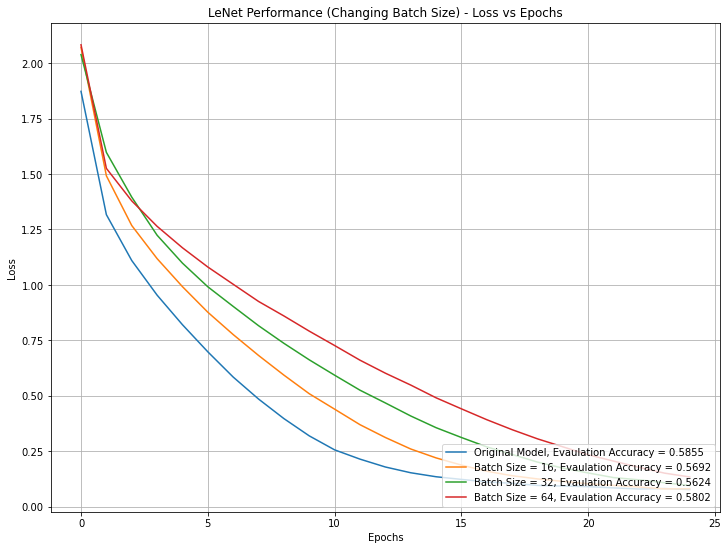

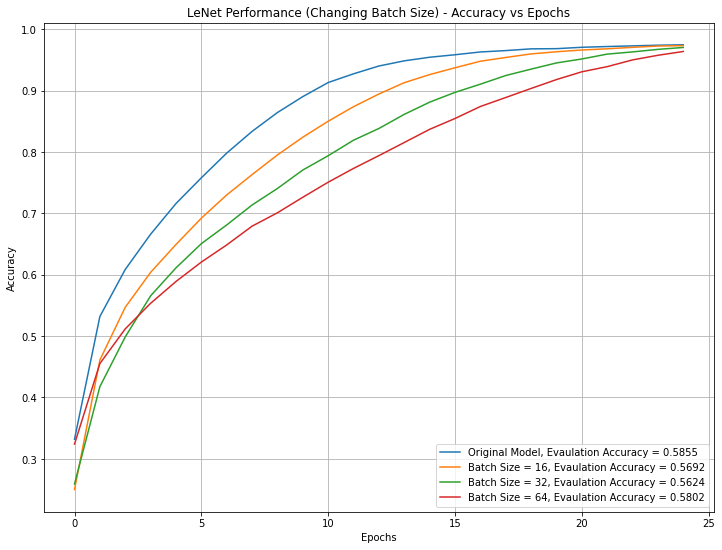

In [43]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Changing Batch Size) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

for idx, i in enumerate(history4):
	if(idx == 0):
		plt.plot(history4[idx].history['loss'], label=f'Original Model, Evaulation Accuracy = {test4[idx][1]:.4}')
	else:
		plt.plot(history4[idx].history['loss'], label=f'Batch Size = {batches[idx-1]}, Evaulation Accuracy = {test4[idx][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Changing Batch Size) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

for idx, i in enumerate(history4):
	if (idx == 0):
		plt.plot(history4[idx].history['accuracy'], label=f'Original Model, Evaulation Accuracy = {test4[idx][1]:.4}')
	else:
		plt.plot(history4[idx].history['accuracy'], label=f'Batch Size = {batches[idx-1]}, Evaulation Accuracy = {test4[idx][1]:.4}')
		

plt.grid()
plt.legend(loc="lower right")
plt.show()

### Problem 2 - Best Performance
The best performing network was the lowest learning rate of 0.0001 tested with the batch size of 16.
These hyperparameters seemed to produce the greatest accuracy from the test data set. See this code
below. 

In [96]:
history4 = []
test4 = []

learning = 0.0001
batch = 32

lanet.set_weights(l1)
opt = keras.optimizers.Adam(learning_rate=learning)
lanet.compile(loss="sparse_categorical_crossentropy",
            optimizer=opt,
            metrics=["accuracy"])

history4.append(lanet.fit(x_train, y_train, epochs=25, batch_size=batch))
test4.append(lanet.evaluate(x_test, y_test))

Epoch 1/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9660 - accuracy: 0.3245
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4692 - accuracy: 0.4717
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2886 - accuracy: 0.5381
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1647 - accuracy: 0.5843
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0645 - accuracy: 0.6218
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9725 - accuracy: 0.6571
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8877 - accuracy: 0.6871
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8038 - accuracy: 0.7183
Epoch 9/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7228 - accuracy: 0.7479
Epoch 10/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.644

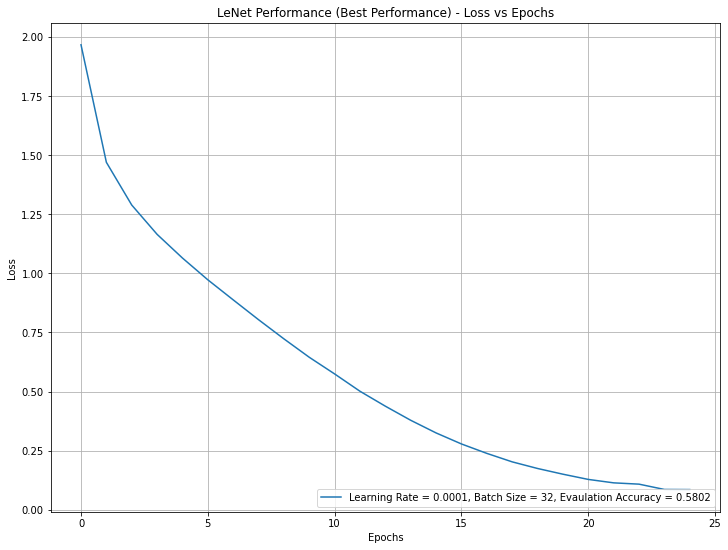

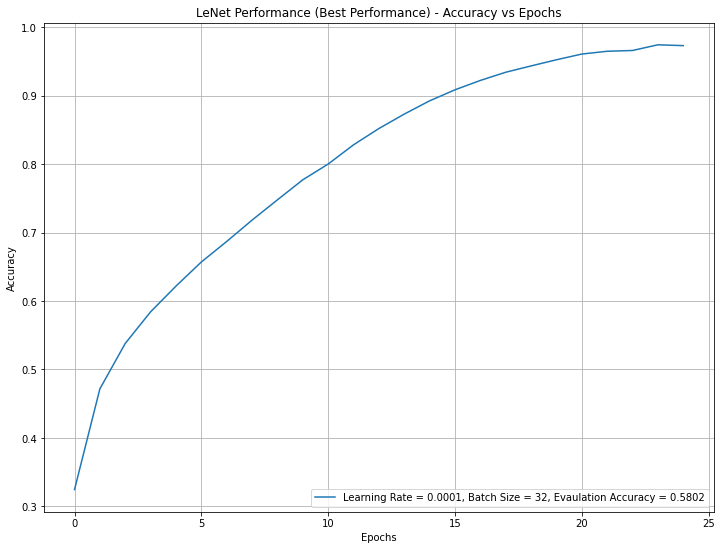

In [97]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Best Performance) - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.plot(history4[0].history['loss'], label=f'Learning Rate = {learning}, Batch Size = {batch}, Evaulation Accuracy = {test4[0][1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance (Best Performance) - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.plot(history4[0].history['accuracy'], label=f'Learning Rate = {learning}, Batch Size = {batch}, Evaulation Accuracy = {test4[0][1]:.4}')

plt.grid()
plt.legend(loc="lower right")
plt.show()

### Problem 2 - Deep Learning Model
The following code represents the LeNet 5 model as a deep learning model.

In [98]:
# Building the LeNet model in keras
lanet_deep = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [32, 32, 3]),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

#Compiling the model with a loss, optimizer, and other metrics
opt = keras.optimizers.Adam(learning_rate=0.0001)
lanet_deep.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

#Shows the whole network topology for the compiled CNN
lanet_deep.summary()

#Training the network.
history5 = lanet_deep.fit(x_train, y_train, epochs=25, batch_size=32)
test5 = lanet_deep.evaluate(x_test, y_test)

print(f"From the deep learning model, the loss achieved and accuracy achieved are: {test5[0]} and {test5[1]} respectively.")

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 3072)              0         
                                                                 
 dense_47 (Dense)            (None, 6)                 18438     
                                                                 
 dense_48 (Dense)            (None, 16)                112       
                                                                 
 dense_49 (Dense)            (None, 120)               2040      
                                                                 
 dense_50 (Dense)            (None, 84)                10164     
                                                                 
 dense_51 (Dense)            (None, 10)                850       
                                                                 
Total params: 31,604
Trainable params: 31,604
Non-tra

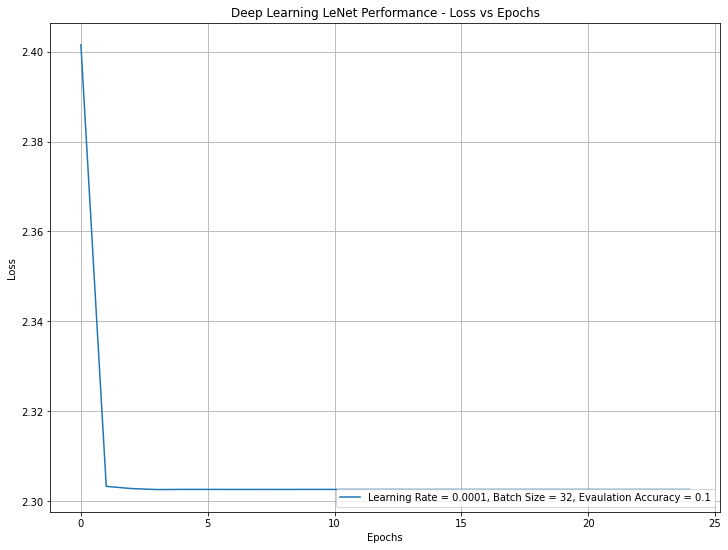

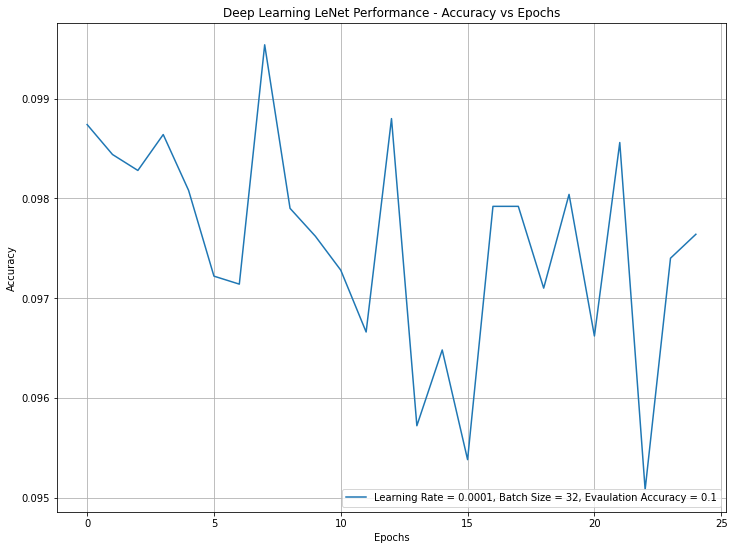

In [99]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Deep Learning LeNet Performance - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.plot(history5.history['loss'], label=f'Learning Rate = {learning}, Batch Size = {batch}, Evaulation Accuracy = {test5[1]:.4}')

plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the accuracy versus the epochs in the training parameters.
plt.figure(figsize=[12, 9])
plt.title("Deep Learning LeNet Performance - Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.plot(history5.history['accuracy'], label=f'Learning Rate = {learning}, Batch Size = {batch}, Evaulation Accuracy = {test5[1]:.4}')

plt.grid()
plt.legend(loc="lower right")
plt.show()

### Problem 2 - Question Responses
The following list are the responses to the questions shown in the assignment document. Please see
above figures to visualize the performance of the LaNet5 architecture.  

1. As the learning rate increases, the accuracy and loss both converged to a undesirable values. 
   Utilizing a lower learning rate with the Adam optimizer yields better accuracy in the test dataset. As shown in the above graphs, the 0.0001 learning rate yielded a 0.57 accuracy for the test dataset during evaluation. 
2. Modifying the batch size did not affect the outcome of the training in general. The default batch
   size maintained the best performance in comparison to the values tested. The best accuracy values
   found were 97.33% and 58.08% respectively for 25 epochs, learning rate of 0.0001, and the default
   batch size for the Adam optimizer.   
3. The best performing LaNet5 network utilized the following hyperparameter values: 0.0001 learning
   rate, 32 batch size, and the Adam optimizer. This combination of parameters with the number of
   epochs set to 25, yielded a train accuracy of 97.45% and a test dataset accuracy of greater than
   58.45%. Without the use of a validation dataset, the best accuracy that can be achieved with the
   circumstance is around 60% for this model. The accuracy discrepancy between the training and test
   dataset implies a complication of overfitting. Cross validation would greatly help the
   performance of the model in generalizing the test dataset output. 
4. The results of the deep learning model are lackluster compared to the CNN counterpart. The
   convolutional layers provided much better performance for feature extraction in comparison to the
   dense layers. The number of parameters within this network, however, are just 31,604 compared to
   the 697,047 parameters found in the LaNet5 architecture shown above. The greater number of
   parameters in the CNN are well worth it due to the excellent performance found using the CNN
   architecture. The accuracy achieved in the CNN network versus the DNN is starkly different in the
   amount of epochs used to train the networks. The accuracy of the CNN is seemingly six times
   better than the DNN. The DNN also plateaued at 10% accuracy in comparison to the 90+% accuracy
   achieved during training over the same amount of epoch steps. 
***

# Problem 3
The goal of problem 3 is to showcase the convolution and max pooling operation used within a CNN architecture. Please see below code for the inner workings on how these functions work. 

In [100]:
X = np.array([[7, 5, 0, 0, 3, 2], [6, 4, 5, 1, 4, 8], [9, 0, 2, 2, 5, 4],  [6, 3, 4, 7, 9, 8], [5, 7, 5, 6, 9, 0], [7, 9, 0, 8, 2, 3]])
f = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

[a, b] = X.shape
y = np.zeros((a-2, b-2))

# Algorithm for manual convolution:
for i in range(1, X.shape[0]-1):
	for j in range(1, X.shape[1]-1):
		x = X[(i-1):(i+2), (j-1):(j+2)]
		s = np.add(f, x)
		y[i-1, j-1] = s.sum()

print('Output of the convolution between the X and f matrices shown above is shown below:')
print(y)

Output of the convolution between the X and f matrices shown above is shown below:
[[38. 19. 22. 29.]
 [39. 28. 39. 48.]
 [41. 36. 49. 50.]
 [46. 49. 50. 52.]]


In [101]:
# The following is the max pooling operation performed on the above output. 
o = np.zeros((2, 2))

o[0, 0] = np.max(y[0:2, 0:2]) # Top left corner of above output.
o[1, 0] = np.max(y[2:4, 0:2]) # Top right corner of above output.
o[0, 1] = np.max(y[0:2, 2:4]) # Bottom left corner of above output.
o[1, 1] = np.max(y[2:4, 2:4]) # Bottom right corner of above output.

print('Output of the max pooling operation.')
print(o)

Output of the max pooling operation.
[[39. 48.]
 [49. 52.]]


### Problem 3 - Responses
The following are responses to the Problem 3 questions. 
1. The dimensions of the input and kernel are 6x6x1 and 3x3x1 respectively. The number of parameters
   is ((3x3x1)+1)x1 = 10 
2. The output activation map is shown above. The dimensions are 4x4x1 for the output. 
3. See the output of the max pooling using a stride of (2,2) and a filter size of (2,2) with no
   padding. 